# Results of the pipeline

In [3]:
import pickle
from autoembedding.results_manager import results2table

# PATH = "./results/phylogenetic_results_emoglobina.pkl"
PATH = "./results/enrichment_results_topo.pkl"


results = pickle.load(open(PATH, "rb"))
r, best_lst = results2table(
    results, 
    embedders= [
        # "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="ward", 
    preferred_metric_gt="euclidean", 
    preferred_method_gt="ward",
    preferred_edge_weight="jaccard",
    preferred_annotation="taxonomy"
)
# r.to_latex("./latex_output.tex")
r

seqvec     prose  alphafold       esm
combiner dimensional PCA                                         
pca      10               0.000719  0.001077   0.000022  0.000337
         50               0.001022  0.001179   0.000331  0.000394
         all              0.001181  0.001176   0.000259  0.000480
average  10               0.000449  0.000744  -0.000159  0.000266
         50               0.000765  0.000834   0.000115  0.000345
         all              0.000759  0.000834   0.000079  0.000336
sum      10               0.000621  0.000304   0.000310  0.000168
         50               0.000984  0.000575   0.000655  0.000295
         all              0.001095  0.000652   0.000411  0.000101
max      10              -0.000009  0.000356  -0.000038  0.000164
         50               0.000399  0.000659  -0.000075  0.000299
         all              0.000107  0.000523   0.000025  0.000228

# Scores

972


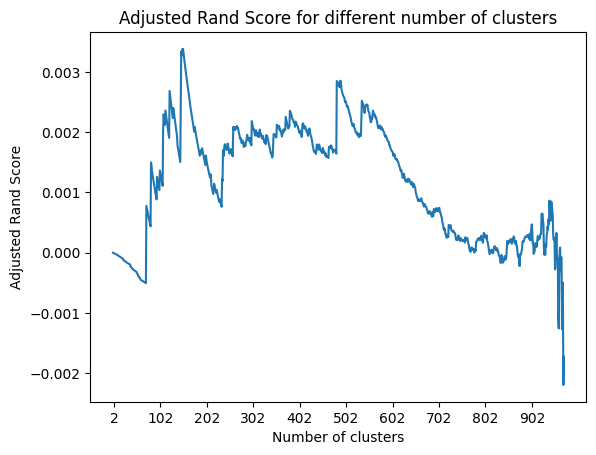

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# reverse the list, since the first element represent each point in its own cluster
best_lst = best_lst[::-1]

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")
plt.xticks(range(2, len(best_lst)+2, 100))

print(len(best_lst))
plt.plot(best_lst)
plt.savefig("results.eps")


In [15]:
print(np.median(best_lst))
print(np.mean(best_lst))

0.0011618926099746913
0.0015663060474107129
